# NanoEventsFactory example

Load a single file from x-cache (using redirector_ucsd) or the grid (using redirector_fnal), and play with the events.


In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import Weights, PackedSelection

from Tools.config_helpers import redirector_fnal, redirector_ucsd
from Tools.nano_mapping import make_fileset
from Tools.helpers import get_samples

import awkward as ak

samples = get_samples()

fileset = make_fileset(['TTW'], samples, redirector=redirector_ucsd, small=True) # changed top -> TTW

# load a subset of events
n_max = 500000
events = NanoEventsFactory.from_root(
    fileset[list(fileset.keys())[1]][0],
    schemaclass = NanoAODSchema,
    entry_stop = n_max).events()



In [3]:
fileset[list(fileset.keys())[1]][0]

'root://xcache-redirector.t2.ucsd.edu:2040//store/mc/RunIIAutumn18NanoAODv7/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21_ext1-v1/60000/02232B20-7228-4348-84C7-72DAFDC2CEB7.root'

In [4]:
events.event

<Array [436885, 436871, ... 444644, 444664] type='5000 * uint64[parameters={"__d...'>

In [5]:
ev = events[events.event==4590003]

In [6]:
ak.to_pandas(ev.MET)

,MetUnclustEnUpDeltaX,MetUnclustEnUpDeltaY,covXX,covXY,covYY,fiducialGenPhi,fiducialGenPt,phi,pt,significance,sumEt,sumPtUnclustered
entry,,,,,,,,,,,,


In [2]:
import time

from Tools.objects import Collections

start_time = time.time()
electrons = Collections(events, 'Electron', 'tight', verbose=1).get()
muons = Collections(events, 'Muon', 'tight', verbose=1).get()


delta_time = time.time()-start_time

print ("\nTook %s seconds"%delta_time)


## Electron selection for WP tight ##
 - pt >= 15
 - abs(etaSC) <= 2.5
 - convVeto == 1
 - lostHits == 0
 - tightCharge == 2
 - abs(dxy) <= 0.05
 - abs(dz) <= 0.1
 - abs(sip3d) <= 4.0
 - tight electron MVA ID
 - custom multi isolation
 - trigger safe
 - custom ID and multi-isolation
Found 111025 objects passing the selection

## Muon selection for WP tight ##
 - pt >= 15
 - abs(eta) <= 2.4
 - mediumId == 1
 - looseId == 1
 - abs(dxy) <= 0.05
 - abs(dz) <= 0.05
 - abs(sip3d) <= 4
 - ptErrRel <= 0.2
 - custom multi isolation
 - custom multi-isolation
Found 156742 objects passing the selection

Took 51.573444843292236 seconds


In [7]:
leptons = ak.concatenate([electrons,muons])

In [8]:
leptons[ak.num(leptons)>1].charge

<Array [[-1, 1], [1, 1], ... [-1, 1], [-1, 1]] type='319 * union[var * int32[par...'>

In [12]:
leptons[((ak.sum(leptons.charge, axis=1)!=0) & (ak.num(leptons)>1))].charge

<Array [[1, 1], [1, 1], ... [1, 1], [1, 1]] type='165 * union[var * int32[parame...'>

In [13]:
leptons[((ak.sum(leptons.charge, axis=1)==0) & (ak.num(leptons)>1))].charge

<Array [[-1, 1], [1, -1], ... [-1, 1], [-1, 1]] type='154 * union[var * int32[pa...'>

In [17]:
ak.max(leptons.pt, axis=1)

<Array [None, 58, None, ... 79.8, 18.2, None] type='10000 * ?float32'>

In [10]:
events[ak.num(muons, axis=1)>0].event

<Array [436885, 436863, ... 444630, 444644] type='1790 * uint64[parameters={"__d...'>

In [7]:
muons.fields

['charge',
 'cleanmask',
 'dxy',
 'dxyErr',
 'dxybs',
 'dz',
 'dzErr',
 'eta',
 'fsrPhotonIdx',
 'fsrPhotonIdxG',
 'genPartFlav',
 'genPartIdx',
 'genPartIdxG',
 'highPtId',
 'highPurity',
 'inTimeMuon',
 'ip3d',
 'isGlobal',
 'isPFcand',
 'isTracker',
 'jetIdx',
 'jetIdxG',
 'jetPtRelv2',
 'jetRelIso',
 'looseId',
 'mass',
 'mediumId',
 'mediumPromptId',
 'miniIsoId',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'multiIsoId',
 'mvaId',
 'mvaLowPt',
 'mvaTTH',
 'nStations',
 'nTrackerLayers',
 'pdgId',
 'pfIsoId',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'pfRelIso04_all',
 'phi',
 'pt',
 'ptErr',
 'segmentComp',
 'sip3d',
 'softId',
 'softMva',
 'softMvaId',
 'tightCharge',
 'tightId',
 'tkIsoId',
 'tkRelIso',
 'triggerIdLoose',
 'tunepRelPt',
 'absMiniIso',
 'ptErrRel',
 'deepJet',
 'jetRelIsoV2',
 'conePt']

In [8]:
fields_to_show = ["pt", "conePt", "eta", "phi", "miniPFRelIso_all", "deepJet"]

ak.to_pandas(muons[events.event==4590009][fields_to_show])

,,pt,conePt,eta,phi,miniPFRelIso_all,deepJet
entry,subentry,,,,,,
0,0,89.001289,91.74375,-1.041992,1.666748,0.0,0.006035


In [9]:
ak.to_pandas(muons[ak.num(muons)>0][fields_to_show])

,,pt,conePt,eta,phi,miniPFRelIso_all,deepJet
entry,subentry,,,,,,
0,0,89.001289,91.743750,-1.041992,1.666748,0.000000,0.006035
1,0,22.520767,23.400000,-0.732056,-2.039551,0.031200,0.014496
2,0,35.408287,38.896875,1.223389,2.832031,0.000000,0.022186
3,0,39.832733,42.187500,-1.335205,-1.277832,0.007453,0.005619
4,0,97.141785,99.843750,-0.975586,-2.340820,0.000000,0.006428
...,...,...,...,...,...,...,...
2285,0,34.735882,35.718750,1.778320,3.064941,0.000000,0.008408
2286,0,81.104309,81.000000,0.807251,0.137268,0.000000,0.004791
2287,0,25.945396,25.101562,-0.316895,0.740234,0.000000,0.013512


You can do anything that you're usually doing inside the processor here as well, so this is very useful for debugging

In [10]:
matched_electrons = electrons[electrons.genPartIdx>=0]
sum(ak.num(matched_electrons, axis=1))

1776

In [11]:
f_in = '/store/mc/RunIIAutumn18NanoAODv7/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/70000/DE335891-829A-B943-99BE-E5A179F5F3EB.root'

events = NanoEventsFactory.from_root(
    redirector_ucsd + f_in,
    schemaclass = NanoAODSchema,
    entry_stop = 9999999).events()

muons = Collections(events, 'Muon', 'tight', verbose=1).get()

single_mu_ev = events[ak.num(muons)>0]

event_list_tight = single_mu_ev.event
event_list_tight


## Muon selection for WP tight ##
 - pt >= 15
 - abs(eta) <= 2.4
 - mediumId == 1
 - looseId == 1
 - abs(dxy) <= 0.05
 - abs(dz) <= 0.05
 - abs(sip3d) <= 4
 - ptErrRel <= 0.2
 - custom multi isolation
 - custom multi-isolation
Found 652 objects passing the selection


<Array [29552, 33557, ... 12024433, 12035747] type='651 * uint64[parameters={"__...'>

In [12]:
import numpy as np
event_selector = (np.zeros_like(events.MET.pt) == 1)

In [13]:
my_events = [29552, 12024433]

In [14]:
for ev in my_events:
    event_selector = (event_selector | (events.event == ev))

In [28]:
mu_df = ak.to_pandas(ak.flatten(muons[event_selector][fields_to_show]))
mu_df

,pt,conePt,eta,phi,miniPFRelIso_all,deepJet
entry,,,,,,
0,22.196507,73.3500,-0.518066,-0.862671,0.101121,0.974121
1,29.695017,93.2625,-1.611572,-1.919434,0.100588,0.124390


In [35]:
ev_df = ak.to_pandas(events.MET[event_selector])
ev_df

,MetUnclustEnUpDeltaX,MetUnclustEnUpDeltaY,covXX,covXY,covYY,fiducialGenPhi,fiducialGenPt,phi,pt,significance,sumEt,sumPtUnclustered
entry,,,,,,,,,,,,
0,-7.730469,-7.636719,860.0,-62.375000,1500.0,-1.039062,9.304688,0.413147,49.778206,2.777344,2454.0,1626.0
1,-5.054688,-2.496094,514.0,-5.484375,390.0,-1.850586,20.265625,-1.706299,52.056957,6.945312,1174.0,1016.0


In [36]:
import pandas as pd
pd.concat([mu_df, ev_df], axis=1, )

,pt,conePt,eta,phi,miniPFRelIso_all,deepJet,MetUnclustEnUpDeltaX,MetUnclustEnUpDeltaY,covXX,covXY,covYY,fiducialGenPhi,fiducialGenPt,phi,pt,significance,sumEt,sumPtUnclustered
entry,,,,,,,,,,,,,,,,,,
0,22.196507,73.3500,-0.518066,-0.862671,0.101121,0.974121,-7.730469,-7.636719,860.0,-62.375000,1500.0,-1.039062,9.304688,0.413147,49.778206,2.777344,2454.0,1626.0
1,29.695017,93.2625,-1.611572,-1.919434,0.100588,0.124390,-5.054688,-2.496094,514.0,-5.484375,390.0,-1.850586,20.265625,-1.706299,52.056957,6.945312,1174.0,1016.0


## Some charge flip work

In [6]:
!wget http://uaf-8.t2.ucsd.edu/~ewallace/chargeflipfull2016.pkl.gz

--2021-06-08 08:49:39--  http://uaf-8.t2.ucsd.edu/~ewallace/chargeflipfull2016.pkl.gz
Resolving uaf-8.t2.ucsd.edu (uaf-8.t2.ucsd.edu)... 169.228.130.7
Connecting to uaf-8.t2.ucsd.edu (uaf-8.t2.ucsd.edu)|169.228.130.7|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951 [application/x-gzip]
Saving to: ‘chargeflipfull2016.pkl.gz’

100%[======================================>] 951         --.-K/s   in 0s      

2021-06-08 08:49:39 (67.6 MB/s) - ‘chargeflipfull2016.pkl.gz’ saved [951/951]



In [1]:
from Tools.helpers import yahist_2D_lookup
import gzip
import pickle
 
class charge_flip:
    def __init__(self, path):
        self.path = path
        with gzip.open(self.path) as fin:
            self.ratio= pickle.load(fin)
    
    def flip_ratio(self, lepton1, lepton2):
        """takes a dilepton event and weights it based on the 
        odds that one of the leptons has a charge flip"""

        flip1 = yahist_2D_lookup(self.ratio, lepton1.pt, abs(lepton1.eta))
        flip2 = yahist_2D_lookup(self.ratio, lepton2.pt, abs(lepton2.eta))

        flip_rate1 = (ak.prod(flip1, axis = 1) * ak.prod(1/(1-flip1), axis = 1) * ak.prod(1-flip2/(1-flip2), axis = 1)) + (ak.prod(flip2, axis = 1) * ak.prod(1/(1-flip2), axis = 1) * ak.prod(1-flip1/(1-flip1), axis = 1))

        return flip_rate1
    
    def flip_weight(self, electron):

        f_1 = yahist_2D_lookup(self.ratio, electron.pt[:,0:1], abs(electron.eta[:,0:1]))
        f_2 = yahist_2D_lookup(self.ratio, electron.pt[:,1:2], abs(electron.eta[:,1:2]))

        # I'm using ak.prod and ak.sum to replace empty arrays by 1 and 0, respectively
        weight = ak.sum(f_1/(1-f_1), axis=1)*ak.prod(1-f_2/(1-f_2), axis=1) + ak.sum(f_2/(1-f_2), axis=1)*ak.prod(1-f_1/(1-f_1), axis=1)

        return weight

In [2]:
cf = charge_flip('chargeflipfull2016.pkl.gz')

In [61]:
electrons.matched_gen.parent.pdgId

<Array [[], [24], [], [24, ... [], [24], []] type='382431 * var * ?int32[paramet...'>

In [3]:
from Tools.gen import *

In [5]:
import numpy as np
electrons = electrons[electrons.genPartIdx>=0]

ele = electrons[((ak.num(electrons,axis=1)>0))]

not_W_or_tau = ((np.abs(find_first_parent(ele.matched_gen))!=24) & (np.abs(find_first_parent(ele.matched_gen))!=15))
not_W_or_tau = ((np.abs(find_first_parent(ele.matched_gen))!=24) & (np.abs(find_first_parent(ele.matched_gen))!=15))

In [63]:
ak.flatten(ele[not_W_or_tau])

<ElectronArray [Electron, Electron, ... Electron] type='1030 * ?electron'>

In [64]:
find_first_parent(ak.flatten(ele[not_W_or_tau].matched_gen))

<Array [2, 1, -2, -1, 2, ... 21, 2, 2, -1, 1] type='1030 * ?int64'>

In [69]:
potential_flip = (abs(find_first_parent(ele.matched_gen)) == 21)

In [70]:
ak.flatten(ele[potential_flip])

<ElectronArray [Electron, Electron, ... None, Electron] type='162 * ?electron'>

In [67]:
electrons

<ElectronArray [[], [Electron], ... [Electron], []] type='382431 * var * electron'>

In [71]:
(162+53)/382431

0.000562192918461108

In [4]:

from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import Weights, PackedSelection

from Tools.config_helpers import redirector_fnal, redirector_ucsd
from Tools.nano_mapping import make_fileset
from Tools.helpers import get_samples

import awkward as ak

samples = get_samples()

fileset = make_fileset(['top'], samples, redirector=redirector_ucsd, small=True) # changed top -> TTW

# load a subset of events
n_max = 500000
events = NanoEventsFactory.from_root(
    fileset[list(fileset.keys())[0]][0],
    schemaclass = NanoAODSchema,
    #entry_stop = n_max,
).events()

from Tools.objects import Collections
from Tools.gen import *

#electrons = Collections(events, 'Electron', 'tight', verbose=1).get()
#electrons = electrons[electrons.genPartIdx>=0]
#ele = electrons[((ak.num(electrons,axis=1)==2))]

#SM_particles = 
#charge_list = 
def get_charge_parent(particle):
    parent = find_first_parent(particle)
    out_charge = ak.zeros_like(parent)
    charge_pairs = [(11,-1), (13,-1), (24, 1)]
    for pdg, charge in charge_pairs:
        out_charge = (parent==pdg)*ak.ones_like(parent)*(charge) + (~(parent==pdg))*out_charge
    return out_charge


#get_charge_parent(ele.matched_gen)

In [9]:
fileset[list(fileset.keys())[0]][0]

'root://xcache-redirector.t2.ucsd.edu:2042//store/mc/RunIIAutumn18NanoAODv7/TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/60000/022107FA-F567-1B44-B139-A18ADC996FCF.root'

In [11]:
electrons = Collections(events, 'Electron', 'tight', verbose=1).get()

# only gen matched electrons
electrons = electrons[electrons.genPartIdx>=0]

# require exactly two electrons
ele = electrons[((ak.num(electrons,axis=1)==2)&(ak.sum(electrons.charge, axis=1)!=0))]

# how many are left?
len(ele)


## Electron selection for WP tight ##
 - pt >= 15
 - abs(etaSC) <= 2.5
 - convVeto == 1
 - lostHits == 0
 - tightCharge == 2
 - abs(dxy) <= 0.05
 - abs(dz) <= 0.1
 - abs(sip3d) <= 4.0
 - tight electron MVA ID
 - custom multi isolation
 - trigger safe
 - custom ID and multi-isolation
Found 418141 objects passing the selection


74

In [5]:
import numpy as np

electron = Collections(events, 'Electron', 'tight', verbose=1).get()
electron = electron[(electron.pt > 20) & (np.abs(electron.eta) < 2.4)]
electron = electron[(electron.genPartIdx >= 0)] #from here on all leptons are gen-matched
electron = electron[(np.abs(electron.matched_gen.pdgId)==11)]
electron = electron[( (electron.genPartFlav==1) | (electron.genPartFlav==15) )] #and now they are all prompt

electron = electron[((ak.num(electron,axis=1)==2)&(ak.sum(electron.charge, axis=1)!=0))]

print ("Number of events with prompt SS:", len(electron))

flipped = (electron.pdgId*(-1) == electron.matched_gen.pdgId)
flipped_electron = electron[flipped]

len(electron[(ak.num(flipped_electron, axis=1)>0)])




## Electron selection for WP tight ##
 - pt >= 15
 - abs(etaSC) <= 2.5
 - convVeto == 1
 - lostHits == 0
 - tightCharge == 2
 - abs(dxy) <= 0.05
 - abs(dz) <= 0.1
 - abs(sip3d) <= 4.0
 - tight electron MVA ID
 - custom multi isolation
 - trigger safe
 - custom ID and multi-isolation
Found 418141 objects passing the selection
Number of events with prompt SS: 21


18

In [6]:
ak.num(electron)

<Array [2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2] type='21 * int64'>

In [7]:
cf.flip_weight(electron)

<Array [0.00496, 4.07e-05, ... 0.00193] type='21 * float64'>

In [3]:
ak.num(flipped_electron)

<Array [1, 0, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1] type='21 * int64'>

In [9]:
events.genWeight

<Array [72.7, 72.7, 72.7, ... 72.7, 72.7, 72.7] type='1140000 * float32[paramete...'>

In [4]:
is_flipped = ( ( (electron.matched_gen.pdgId*(-1) == electron.pdgId) | (find_first_parent(electron.matched_gen)*(-1) == electron.pdgId) ) & (np.abs(electron.pdgId) == 11) )
        
        
flipped_electron = electron[is_flipped]
flipped_electron = flipped_electron[(ak.fill_none(flipped_electron.pt, 0)>0)]
flipped_electron = flipped_electron[~(ak.is_none(flipped_electron))]
n_flips = ak.num(flipped_electron)

In [5]:
n_flips

<Array [1, 0, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1] type='21 * int64'>

In [23]:
electron = Collections(events, 'Electron', 'tight', verbose=1).get()
electron = electron[(electron.pt > 20) & (np.abs(electron.eta) < 2.4)]
electron = electron[(electron.genPartIdx >= 0)] #from here on all leptons are gen-matched
electron = electron[(np.abs(electron.matched_gen.pdgId)==11)]
electron = electron[( (electron.genPartFlav==1) | (electron.genPartFlav==15) )] #and now they are all prompt

flipped = (electron.pdgId*(-1) == electron.matched_gen.pdgId)
flipped_electron = electron[flipped]


## Electron selection for WP tight ##
 - pt >= 15
 - abs(etaSC) <= 2.5
 - convVeto == 1
 - lostHits == 0
 - tightCharge == 2
 - abs(dxy) <= 0.05
 - abs(dz) <= 0.1
 - abs(sip3d) <= 4.0
 - tight electron MVA ID
 - custom multi isolation
 - trigger safe
 - custom ID and multi-isolation
Found 418141 objects passing the selection


In [24]:
non_flip_events = events[((ak.num(electron, axis=1)==2)&(ak.sum(electron.charge, axis=1)!=0)&(ak.num(flipped_electron, axis=1)==0))]
non_flip_events.event

<Array [6853556, 33539380, 64376350] type='3 * uint64[parameters={"__doc__": "ev...'>

In [14]:
ak.num(electron, axis=1)

<Array [2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2] type='21 * int64'>

In [13]:
non_flip_events.Electron.pt

<Array [[9.83], [17.5], [15.7]] type='3 * var * float32[parameters={"__doc__": "...'>

In [ ]:
flipped_electron = electron[flipped]

In [8]:
non_flip_events.luminosityBlock

<Array [919, 919, 919] type='3 * uint32[parameters={"__doc__": "luminosityBlock/...'>

In [23]:
for x in find_first_parent(electron.matched_gen):
    print (x)

[24, -24]
[-24, 24]
[24, -24]
[-24, 24]
[24, -24]
[-24, 24]
[-24, -24]
[-24, 24]
[24, -24]
[-24, 24]
[24, -24]
[-24, -24]
[-15, -24]
[24, -24]
[-24, 24]
[24, -24]
[-24, 24]
[-24, 24]
[24, -24]
[24, -24]
[-24, 24]


In [15]:
electron.matched_gen.pdgId

<Array [[-11, 11], [-11, ... -11], [-11, 11]] type='28 * var * ?int32[parameters...'>

In [5]:
prompt = ele[((ele.genPartFlav==1)|(ele.genPartFlav==15))]

In [7]:
ele[(ak.num(prompt, axis=1)==2)]

<ElectronArray [[Electron, Electron, ... Electron]] type='28 * var * electron'>

In [3]:
# check that this is really all SS
ele.charge

<Array [[1, 1], [1, 1], ... [-1, -1], [-1, -1]] type='74 * var * int32[parameter...'>

In [4]:
ele.pdgId*(-1) == ele.matched_gen.pdgId

<Array [[True, True], ... [False, True]] type='74 * var * ?bool'>

In [5]:
ak.num((ele.pdgId == ele.matched_gen.pdgId), axis=1)

<Array [2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2] type='74 * int64'>

In [15]:
ele.pdgId

<Array [[-11, -11], [-11, ... 11], [11, 11]] type='29 * var * int32[parameters={...'>

In [16]:
ele.matched_gen.pdgId

<Array [[-11, -11], [-11, ... 11], [11, 11]] type='29 * var * ?int32[parameters=...'>

In [6]:
flipped_ele = ele[(ele.pdgId*(-1) == ele.matched_gen.pdgId)]

In [7]:
ak.num(flipped_ele, axis=1)

<Array [0, 0, 0, 0, 1, 0, ... 0, 1, 0, 0, 1, 1] type='74 * int64'>

In [8]:
# flipped electrons
sum(ak.num(flipped_ele, axis=1))

23

In [9]:
# total events with SS
len(flipped_ele)

74

In [10]:
parents = find_first_parent(ele.matched_gen)

In [11]:
print (parents)

[[24, -511], [24, 531], [24, -5132], [24, ... 511], [-521, 15], [-24, 24], [24, -24]]


In [12]:
non_prompt = ele[abs(parents)>24]

In [14]:
sum(ak.num(non_prompt))

45

In [19]:
prompt = ele[abs(parents)<25]

In [20]:
ak.num(prompt)

<Array [1, 1, 1, 1, 2, 2, ... 1, 2, 1, 1, 2, 2] type='74 * int64'>

In [23]:
diprompt = ele[(ak.num(prompt, axis=1)==2)]
len(diprompt)

29

In [24]:
flipped_prompt = diprompt[(diprompt.pdgId*(-1) == diprompt.matched_gen.pdgId)]
sum(ak.num(flipped_prompt, axis=1))
#diprompt

23

In [25]:
parents = find_first_parent(diprompt.matched_gen)
print(parents)

[[24, -24], [-24, 24], [24, 1], [24, -24, ... 24], [24, -24], [-24, 24], [24, -24]]


In [26]:
for pair in parents:
    print (pair)

[24, -24]
[-24, 24]
[24, 1]
[24, -24]
[24, -24]
[-24, 24]
[24, -24]
[-24, 24]
[-24, -24]
[24, -6]
[-24, 24]
[24, -24]
[-24, 24]
[24, -24]
[24, -24]
[-24, -24]
[-15, -24]
[24, -5]
[-24, -15]
[24, -24]
[-24, 24]
[24, -24]
[-24, 24]
[-24, 24]
[24, -24]
[-24, 24]
[24, -24]
[-24, 24]
[24, -24]


In [27]:
for ch in diprompt.charge:
    print (ch)

[-1, -1]
[1, 1]
[1, 1]
[-1, -1]
[-1, -1]
[-1, -1]
[-1, -1]
[1, 1]
[-1, -1]
[1, 1]
[1, 1]
[-1, -1]
[-1, -1]
[1, 1]
[-1, -1]
[-1, -1]
[-1, -1]
[1, 1]
[-1, -1]
[-1, -1]
[-1, -1]
[1, 1]
[-1, -1]
[-1, -1]
[-1, -1]
[1, 1]
[-1, -1]
[-1, -1]
[-1, -1]


In [29]:
for pair in find_first_parent(diprompt[(ak.num(flipped_prompt, axis=1)>0)].matched_gen):
    print (pair)

[24, -24]
[24, -24]
[24, -24]
[-24, 24]
[24, -24]
[-24, 24]
[-24, 24]
[24, -24]
[-24, 24]
[24, -24]
[24, -24]
[-15, -24]
[-24, -15]
[24, -24]
[-24, 24]
[24, -24]
[-24, 24]
[-24, 24]
[24, -24]
[-24, 24]
[24, -24]
[-24, 24]
[24, -24]


# Trilep checks

In [45]:
#f_in = 'root://xcache-redirector.t2.ucsd.edu:2042//store/mc/RunIIAutumn18NanoAODv7/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21_ext1-v1/60000/02232B20-7228-4348-84C7-72DAFDC2CEB7.root'
f_in = 'root://xcache-redirector.t2.ucsd.edu:2042//store/mc/RunIISummer20UL18NanoAODv2/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v15_L1v1-v1/30000/13C6DDDD-1DE7-CB48-AC06-9B28CC47D344.root'

events = NanoEventsFactory.from_root(
    f_in,
    schemaclass = NanoAODSchema,
    #entry_stop = n_max,
).events()


In [46]:
electron = Collections(events, 'Electron', 'tight', verbose=1).get()
muon = Collections(events, 'Muon', 'tight', verbose=1).get()


## Electron selection for WP tight ##
 - pt >= 15
 - abs(etaSC) <= 2.5
 - convVeto == 1
 - lostHits == 0
 - tightCharge == 2
 - abs(dxy) <= 0.05
 - abs(dz) <= 0.1
 - abs(sip3d) <= 4.0
 - tight electron MVA ID
 - custom multi isolation
 - trigger safe
 - custom ID and multi-isolation
Found 284052 objects passing the selection

## Muon selection for WP tight ##
 - pt >= 15
 - abs(eta) <= 2.4
 - mediumId == 1
 - looseId == 1
 - abs(dxy) <= 0.05
 - abs(dz) <= 0.05
 - abs(sip3d) <= 4
 - ptErrRel <= 0.2
 - custom multi isolation
 - custom multi-isolation
Found 383144 objects passing the selection


In [47]:
trilep_events = events[((ak.num(electron, axis=1)+ak.num(muon, axis=1))==3)]

In [48]:
len(trilep_events)

33869

In [49]:
from Tools.objects import choose

dimu_veto = choose(muon,2)
diele_veto = choose(electron,2)
OS_dimu_veto = dimu_veto[(dimu_veto['0'].charge*dimu_veto['1'].charge < 0)]
OS_diele_veto = diele_veto[(diele_veto['0'].charge*diele_veto['1'].charge < 0)]


In [50]:
OS_dimu_veto

<CandidateArray [[], [], [], ... '0': Muon, '1': Muon}]] type='1018000 * var * C...'>

In [51]:
SFOS = ak.concatenate([OS_diele_veto, OS_dimu_veto], axis=1)

In [52]:
events[((ak.num(SFOS)>0)&((ak.num(electron, axis=1)+ak.num(muon, axis=1))==3))]

<NanoEventsArray [<event 1:35:34152>, ... ] type='33080 * event'>

In [53]:
33080/33869

0.9767043609200153

In [38]:
2804/3749

0.7479327820752201

In [54]:
events[((ak.num(SFOS)==0)&((ak.num(electron, axis=1)+ak.num(muon, axis=1))==3))]

<NanoEventsArray [<event 1:35:34395>, ... ] type='789 * event'>

In [40]:
945/3749

0.25206721792477993

In [55]:
events[((ak.sum(electron.charge, axis=1)+(ak.sum(muon.charge, axis=1))<0)&((ak.num(electron, axis=1)+ak.num(muon, axis=1))==3))]

<NanoEventsArray [<event 1:35:34189>, ... ] type='17010 * event'>

In [56]:
17010/33869

0.5022291771236234

# Sample validation

In [37]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import Weights, PackedSelection

from Tools.config_helpers import redirector_fnal, redirector_ucsd

import awkward as ak

f_in = '/store/mc/RunIISummer20UL17NanoAODv2/WZTo3LNu_mllmin01_NNPDF31_TuneCP5_13TeV_powheg_pythia8/NANOAODSIM/106X_mc2017_realistic_v8-v1/50000/D613B3F6-C909-9A46-BC99-59CC6FF21223.root'

# load a subset of events
n_max = 500000
events_UL = NanoEventsFactory.from_root(
    redirector_ucsd+f_in,
    schemaclass = NanoAODSchema,
    entry_stop = n_max).events()



In [38]:
from Tools.objects import choose
from yahist import Hist1D

dimuon_UL = choose(events_UL.Muon, 2)

In [59]:
bins = [ x for x in range(0,200,2)]
Hist1D(ak.flatten(dimuon_UL[ak.num(dimuon_UL)>0].mass), bins=bins)

[2329.00 ± 48.26   3165.00 ± 56.26   14262.00 ± 119.42   11493.00 ± 107.21
 9831.00 ± 99.15   8273.00 ± 90.96   7182.00 ± 84.75   6479.00 ± 80.49
 5795.00 ± 76.12   5149.00 ± 71.76   4712.00 ± 68.64   4319.00 ± 65.72
 3879.00 ± 62.28   3416.00 ± 58.45   3046.00 ± 55.19   2807.00 ± 52.98
 2612.00 ± 51.11   2440.00 ± 49.40   2182.00 ± 46.71   2020.00 ± 44.94
 1785.00 ± 42.25   1850.00 ± 43.01   1671.00 ± 40.88   1618.00 ± 40.22
 1357.00 ± 36.84   1394.00 ± 37.34   1320.00 ± 36.33   1289.00 ± 35.90
 1199.00 ± 34.63   1208.00 ± 34.76   1145.00 ± 33.84   1103.00 ± 33.21
 1031.00 ± 32.11   995.00 ± 31.54   1060.00 ± 32.56   956.00 ± 30.92
 1003.00 ± 31.67   988.00 ± 31.43   967.00 ± 31.10   1017.00 ± 31.89
 1160.00 ± 34.06   1373.00 ± 37.05   1895.00 ± 43.53   2953.00 ± 54.34
 6301.00 ± 79.38   9937.00 ± 99.68   6310.00 ± 79.44   2668.00 ± 51.65
 1387.00 ± 37.24   958.00 ± 30.95   734.00 ± 27.09   585.00 ± 24.19
 559.00 ± 23.64   487.00 ± 22.07   461.00 ± 21.47   376.00 ± 19.39
 356.00 ± 18.87   373.00 ± 19.31   380.00 ± 19.49   351.00 ± 18.73
 336.00 ± 18.33   344.00 ± 18.55   316.00 ± 17.78   300.00 ± 17.32
 299.00 ± 17.29   265.00 ± 16.28   236.00 ± 15.36   220.00 ± 14.83
 254.00 ± 15.94   246.00 ± 15.68   250.00 ± 15.81   208.00 ± 14.42
 215.00 ± 14.66   220.00 ± 14.83   175.00 ± 13.23   175.00 ± 13.23
 192.00 ± 13.86   175.00 ± 13.23   167.00 ± 12.92   157.00 ± 12.53
 163.00 ± 12.77   130.00 ± 11.40   124.00 ± 11.14   158.00 ± 12.57
 114.00 ± 10.68   127.00 ± 11.27   130.00 ± 11.40   120.00 ± 10.95
 99.00 ± 9.95   115.00 ± 10.72   104.00 ± 10.20   107.00 ± 10.34
 114.00 ± 10.68   96.00 ± 9.80   91.00 ± 9.54   88.00 ± 9.38
 107.00 ± 10.34   103.00 ± 10.15   3113.00 ± 55.79]

In [58]:
bins = [ x/10. for x in range(0,200,1)]
h_UL = Hist1D(ak.flatten(dimuon_UL[ak.num(dimuon_UL)>0].mass), bins=bins, overflow=False)

In [42]:
f_in = '/store/mc/RunIISummer16NanoAODv7/WZTo3LNu_mllmin01_13TeV-powheg-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8-v1/70000/5023ABC1-B4D7-D749-BD69-7EA689C7D3B6.root'

# load a subset of events
n_max = 500000
events = NanoEventsFactory.from_root(
    redirector_ucsd+f_in,
    schemaclass = NanoAODSchema,
    entry_stop = n_max).events()

dimuon = choose(events.Muon, 2)
bins = [ x/10. for x in range(0,200,1)]

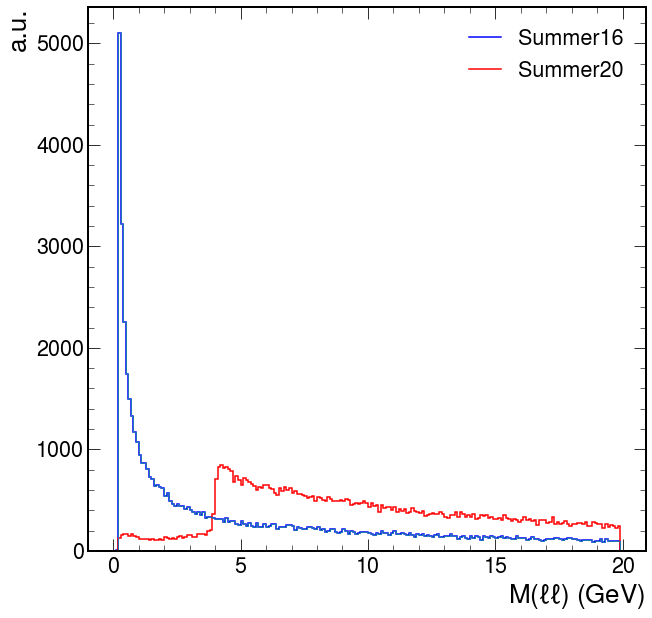

In [56]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

h = Hist1D(ak.flatten(dimuon[ak.num(dimuon)>0].mass), bins=bins, overflow=False)

f, ax = plt.subplots()

hep.histplot(
    #[(h/sum(h.counts)).counts, (h_UL/sum(h_UL.counts)).counts],
    [h.counts, h_UL.counts],
    h.edges,
    #w2=[my_histos['tch'].errors/100, my_histos['tuh'].errors/100],
    histtype="step",
    stack=False,
    label=[r'Summer16', r'Summer20'],
    color=['blue', 'red'],
    #density=[True, True],
    ax=ax)

h.plot()

ax.set_ylabel(r'a.u.')
ax.set_xlabel(r'$M(\ell\ell)\ (GeV)$')

plt.legend()

f.savefig('/home/users/dspitzba/public_html/WZ_minmll.png')

In [51]:
sum(h.counts)

60370.0

In [60]:
events_UL.Jet.jetId

<Array [[6], [6], [0, ... 2, 6, 6, 6, 6, 6, 6]] type='500000 * var * int32[param...'>

In [63]:
events.Flag.ecalBadCalibFilter

<Array [True, True, True, ... True, True, True] type='500000 * bool[parameters={...'>